In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('~/.kaggle/competitions/web-traffic-time-series-forecasting/train_1.csv.zip')

In [3]:
df.shape

(145063, 551)

In [4]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
df = df[~df.isnull().any(axis=1)]
df.shape

(117277, 551)

In [6]:
# name_project_access_agent
def page_features():
    feature_names = ['name', 'project', 'access', 'agent']
    def parse_features(page):
        features = []
        for i in range(len(feature_names)):
            page, sep, feature = page.rpartition('_')
            features.append(feature)
        return features
    page_features = (parse_features(page) for page in df.Page)
    return pd.DataFrame(page_features, columns=feature_names[::-1])
X_static = page_features()       

In [7]:
X_static.head()

,agent,access,project,name
0,spider,all-access,zh.wikipedia.org,2NE1
1,spider,all-access,zh.wikipedia.org,2PM
2,spider,all-access,zh.wikipedia.org,3C
3,spider,all-access,zh.wikipedia.org,4minute
4,spider,all-access,zh.wikipedia.org,5566


In [8]:
X_pageviews = df.iloc[:, -31:-1]
X_pageviews.shape

(117277, 30)

In [9]:
X_pageviews = df.iloc[:,-31:]
X_pageviews.columns = [f'pageviews_{i}' if i != 30 else 'target' for i in range(31)]
X_pageviews.head()

,pageviews_0,pageviews_1,pageviews_2,pageviews_3,pageviews_4,pageviews_5,pageviews_6,pageviews_7,pageviews_8,pageviews_9,...,pageviews_21,pageviews_22,pageviews_23,pageviews_24,pageviews_25,pageviews_26,pageviews_27,pageviews_28,pageviews_29,target
0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,18.0,15.0,19.0,35.0,16.0,25.0,13.0,19.0,15.0,25.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


In [10]:
X = X_static.merge(X_pageviews, left_index=True, right_index=True)
X.head()

,agent,access,project,name,pageviews_0,pageviews_1,pageviews_2,pageviews_3,pageviews_4,pageviews_5,...,pageviews_21,pageviews_22,pageviews_23,pageviews_24,pageviews_25,pageviews_26,pageviews_27,pageviews_28,pageviews_29,target
0,spider,all-access,zh.wikipedia.org,2NE1,14.0,47.0,15.0,14.0,18.0,20.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,spider,all-access,zh.wikipedia.org,2PM,17.0,23.0,19.0,21.0,47.0,28.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,spider,all-access,zh.wikipedia.org,3C,8.0,1.0,1.0,2.0,5.0,3.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,spider,all-access,zh.wikipedia.org,4minute,5.0,10.0,8.0,17.0,13.0,23.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,spider,all-access,zh.wikipedia.org,A'N'D,18.0,15.0,19.0,35.0,16.0,25.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


In [11]:
X_static.shape, X_pageviews.shape, X.shape

((117277, 4), (117277, 31), (92219, 35))

In [12]:
y = X.pop('target')
y.head()

0    20.0
1    20.0
2    17.0
3    11.0
5    50.0
Name: target, dtype: float64

In [13]:
X.agent.nunique(), X.access.nunique(), X.project.nunique()

(2, 3, 9)

```python
token_mapping = {k: i for i, k in enumerate(my_df[['my-column']].unique())}  # annoying

i = Input((None,), name='my-column')  # naming is for the dict input
e = Embedding(input_dim=<calculated from somewhere>, output_dim=<whatever you want>, name='my-column-embedding')
embedding_layer = e(i)
# ^ annoying, couldn't this be one call to something?

# have to keep track of the inputs, :(
model = Model(inputs=[i, ...])

# remember this mapping? need to keep track of this too
my_df['my-column'] = my_df['my-column'].map(token_mapping)
model.fit(my_df.to_dict('series'), ...)
```

```python
# still need to kep track of tokenizer, but Input()/Embedding()/Embedding()(Input()) is a one-liner
# also have to keep track of input layer
embedding_input, embedding_layer, token_mapping = make_embedding(my_df[['my-column']], make_tokenizer)

model = Model(inputs=[embedding_input, ...])

my_df[['my-column']] = my_df[['my-column']].map(token_mapping)
model.fit(my_df.to_dict('series'), ...)
```

```python
from tensorflow.feature_column import embedding_column, catetgorical_column_with_vocabulary_list, DenseFeatures

my_feature_column = embedding_column(
    catetgorical_column_with_vocabulary_list('my-column', my_df[['my-column']].unique())
)
my_feature_layer = DenseFeatures([my_feature_column])  # this is just like Dense(32)

# in order to use it, have to call on an input
my_feature_input = Input((1,), name='my-column')
my_feature_layer_output = my_feature_layer(my_feature_input)  # this is just like Dense(32, input_shape=(...)),
                                                              # or Dense(32)(Input(...))

model = Model([my_feature_input, ...], ...)

# no token mapping
# can we look at the mapping?
model.fit(my_df.to_dict('series'))
```

In [32]:
tf.keras.layers.Dense(32)(
    tf.keras.layers.DenseFeatures(static_feature_columns)
)

AttributeError: 'DenseFeatures' object has no attribute 'shape'

In [14]:
import tensorflow as tf

# Create feature columns for time independent features
static_feature_columns = [
    tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            'agent', X.agent.unique())),
    tf.feature_column.indicator_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            'access', X.access.unique())),
    tf.feature_column.embedding_column(
        tf.feature_column.categorical_column_with_vocabulary_list(
            'project', X.project.unique()), 3),
]

static_feature_inputs = {
    'agent': tf.keras.Input((1,), dtype=tf.dtypes.string, name='agent'),
    'access': tf.keras.Input((1,), dtype=tf.dtypes.string, name='access'),
    'project': tf.keras.Input((1,), dtype=tf.dtypes.string, name='project'),
}
static_layer = tf.keras.layers.DenseFeatures(static_feature_columns)
static_inputs = static_layer(static_feature_inputs)


# Create feature column for pageviews
pageview_feature_columns = [
    tf.feature_column.numeric_column(
        f'pageviews_{i}', normalizer_fn=tf.math.log1p)
    for i in range(30)]

pageview_input_layers = [
    tf.keras.Input((1,), name=f'pageviews_{i}')
    for i in range(30)
]

pageview_layers = [
    tf.keras.layers.DenseFeatures([fc])({fc.key: I})
    for fc, I in zip(pageview_feature_columns, pageview_input_layers)
]


sequences = [tf.keras.layers.Concatenate()([static_inputs, L]) for L in pageview_layers]

W1024 14:15:13.269235 140736132436928 deprecation.py:323] From /Users/dgates/venvs/tf2/lib/python3.6/site-packages/tensorflow_core/python/feature_column/feature_column_v2.py:4276: IndicatorColumn._variable_shape (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W1024 14:15:13.273097 140736132436928 deprecation.py:323] From /Users/dgates/venvs/tf2/lib/python3.6/site-packages/tensorflow_core/python/feature_column/feature_column_v2.py:4331: VocabularyListCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.


In [15]:
# lstm
concat = tf.keras.layers.Concatenate()
reshape = tf.keras.layers.Reshape((-1, 30))
lstm_input = reshape(concat(sequences))
lstm = tf.keras.layers.LSTM(512)(lstm_input)
output = tf.keras.layers.Dense(1)(lstm)

In [16]:
inputs = list(static_feature_inputs.values()) + pageview_input_layers
model = tf.keras.models.Model(inputs=inputs, outputs=output)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
access (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
agent (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
project (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
pageviews_0 (InputLayer)        [(None, 1)]          0                                            
______________________________________________________________________________________________

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

Using TensorFlow backend.


AssertionError: 

In [19]:
import numpy as np
train_idx = np.random.choice([True, False], p=[0.75, 0.25], size=len(X))

In [20]:
X_train = X[train_idx]
X_test = X[~train_idx]
y_train = y[train_idx]
y_test = y[~train_idx]

In [21]:
# X_train = all_feature_set.transform(X_train)
# X_test = all_feature_set.transform(X_test)

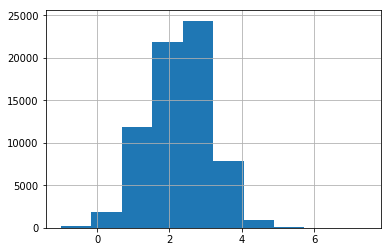

In [22]:
np.log10(y_train+1e-1).hist()

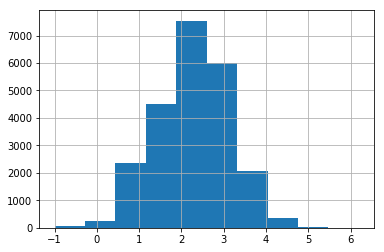

In [23]:
np.log10(y_test+1e-1).hist()

In [24]:
import tensorflow as tf
model.compile(loss=tf.losses.Huber(), optimizer='adam')

In [25]:
z = {k: v.values for k, v in dict(X_train).items()}

In [26]:
model.fit(
    X_train.to_dict('series'),
    np.log10(y_train+1),
    epochs=3,
    validation_data=(X_test.to_dict('series'), np.log10(y_test+1)))

W1024 14:15:20.317030 140736132436928 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: (<class 'dict'> containing {"<class 'str'>"} keys and {"<class 'pandas.core.series.Series'>"} values), <class 'NoneType'>


Train on 69051 samples, validate on 23168 samples
Epoch 1/3
69051/69051 [==============================] - 132s 2ms/sample - loss: 0.0247 - val_loss: 0.0212
Epoch 2/3
69051/69051 [==============================] - 131s 2ms/sample - loss: 0.0198 - val_loss: 0.0204
Epoch 3/3
69051/69051 [==============================] - 127s 2ms/sample - loss: 0.0193 - val_loss: 0.0187


W1021 13:46:31.624719 140736850858944 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: (<class 'dict'> containing {"<class 'str'>"} keys and {"<class 'pandas.core.series.Series'>"} values), <class 'NoneType'>


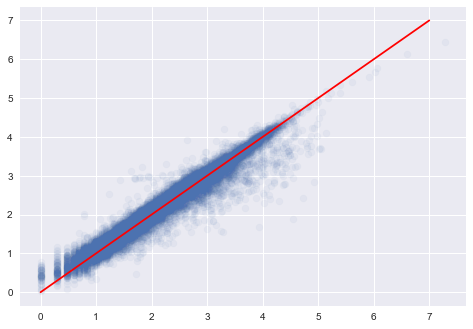

In [54]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
p = model.predict(X_test.to_dict('series'))[:, 0]
plt.scatter(np.log10(y_test+1), p, alpha=0.05)
plt.plot([0, 7], [0, 7], color='r')